# PyTorch Workshop
Author: Jin Yeom (jinyeom@utexas.edu)
<img src="images/pytorch.png">

## Contents
- [Introduction](#Introduction)
- [Basic tensor operations](#Basic-tensor-operations)
- [Neural networks](#Neural networks)

## Introduction

**[PyTorch](https://pytorch.org/)** is an open source machine learning library for Python, developed by Facebook. Its stengths include,
- generally faster and more intuitive than TensorFlow
- well integrated with Python and easy to debug
- dynamic computational graph, which makes it more suitable for recurrent models and reinforcement learning

Import PyTorch with `import torch`.

In [10]:
import torch

Import modules related to neural networks with `from torch import nn`. For functional interfaces, which are useful for non-parametric functions, e.g., nonlinear functions and loss functions, use `from torch.nn import functional as F`.

In [11]:
from torch import nn
from torch.nn import functional as F

PyTorch also provides a set of tools that are particularly useful for computer vision related tasks, called **Torchvision**. It includes things like preprocessing tools for images or benchmark datasets for deep learning. Use it with `import torchvision`.

In [12]:
import torchvision
from torchvision import transforms
from torchvision import datasets

If you're familiar with [Keras](https://keras.io/), one of the neat things from Keras is that it shows summary of your models. Not necessarily important, but it's nice to have it. Note that this is a third-party library from [here](https://github.com/sksq96/pytorch-summary).

In [13]:
from torchsummary import summary

Now, let's import some other packages we need for the notebook and move on!

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
%matplotlib notebook

## Basic tensor operations

In [3]:
A = torch.zeros((2, 3))
print(A)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
B = torch.ones_like(A)
print(B)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
C = torch.full_like(B, 5)
print(C)

tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [5]:
D = torch.cat([A, B, C], dim=0)
print(D)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [5., 5., 5.],
        [5., 5., 5.]])


In [6]:
print(D.shape)
E = torch.reshape(D, (2, 9))
print(E)

torch.Size([6, 3])
tensor([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [1., 1., 1., 5., 5., 5., 5., 5., 5.]])


In [7]:
# NOTE: torch.t can be used for 2D matrices, but, torch.transpose
# provides a more general functionality, which can be used for any
# numbers of dimensions.
E_t = torch.transpose(E, 0, 1)
print(E_t)

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 5.],
        [0., 5.],
        [0., 5.],
        [1., 5.],
        [1., 5.],
        [1., 5.]])


## Neural Networks

In [5]:
class TwoLayerFullyConnected(nn.Module):
    def __init__(self, in_features, out_features):
        super(TwoLayerFullyConnected, self).__init__()
        self.fc1 = torch.nn.Linear(in_features, 128),
        self.fc2 = torch.nn.Linear(128, out_features),
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=-1)

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_train = datasets.MNIST("./datasets/mnist", 
                             train=True, 
                             transform=transform, 
                             download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, 
                                           batch_size=64, 
                                           shuffle=True, 
                                           num_workers=2)

mnist_test = datasets.MNIST("./datasets/mnist", 
                            train=False, 
                            transform=transform, 
                            download=True)
test_loader = torch.utils.data.DataLoader(mnist_test, 
                                          batch_size=64, 
                                          shuffle=False, 
                                          num_workers=2)

In [7]:
print("datasets/mnist/raw:")
!ls datasets/mnist/raw
print("datasets/mnist/processed:")
!ls datasets/mnist/processed

datasets/mnist/raw:
t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte
datasets/mnist/processed:
test.pt  training.pt


In [8]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

<IPython.core.display.Javascript object>


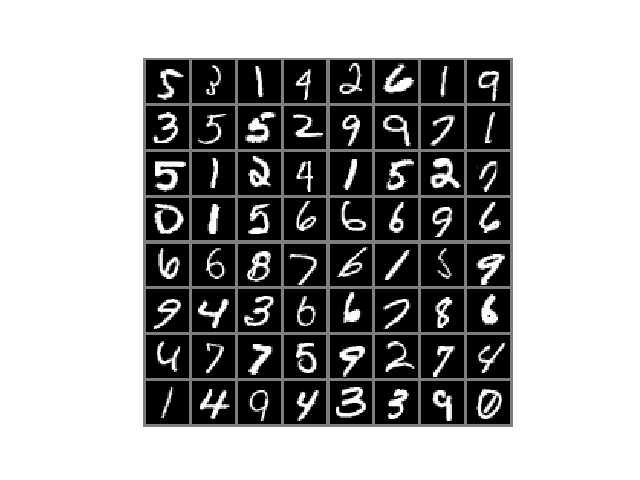

In [9]:
train_iter = iter(train_loader)
images, labels = train_iter.next()
imshow(torchvision.utils.make_grid(images))